<a href="https://colab.research.google.com/github/emirenah92/DataSciencePsychNeuro/blob/master/ExerciseSubmissions/Exercise17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [1]:
# WRITE YOUR CODE HERE
install.packages("glmnet")
library(glmnet)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [10]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)
simulated_data<-data.frame(x,y)
head(simulated_data)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [73]:
# WRITE YOUR CODE HERE
train<-sample(1:nrow(simulated_data), 50)
train.set <- data.frame(x = x[train], y = y[train])
test.set <- data.frame(x = x[-train], y = y[-train])
head(train.set)
dim(train.set)
head(test.set)
dim(test.set)

,x,y
,<dbl>,<dbl>
1,0.18,0.9768865
2,-3.42,-0.2126339
3,-4.32,0.5534833
4,-1.26,1.2141656
5,-7.20,1.5256458
6,8.82,1.1521831


[1] 50  2

,x,y
,<dbl>,<dbl>
1,-9.00,-1.0383634
2,-8.82,-0.7461157
3,-8.46,-0.5442746
4,-7.92,0.2132742
5,-7.38,1.1078956
6,-6.84,0.9066007


[1] 51  2

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

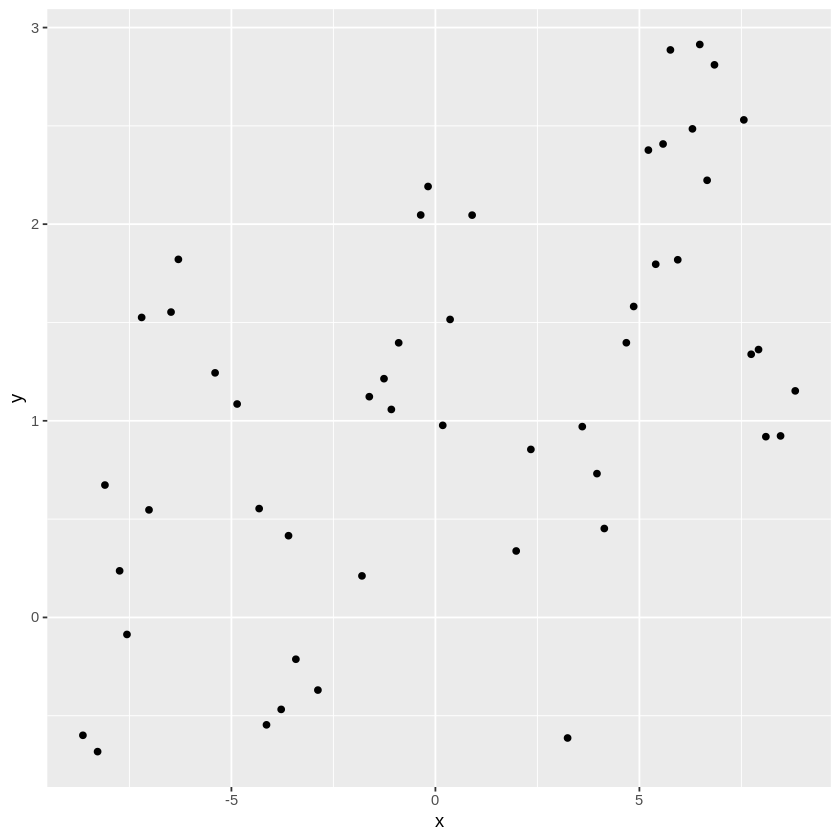

In [74]:
# WRITE YOUR CODE HERE
ggplot(train.set,aes(x,y))+
  geom_point()

How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
>

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

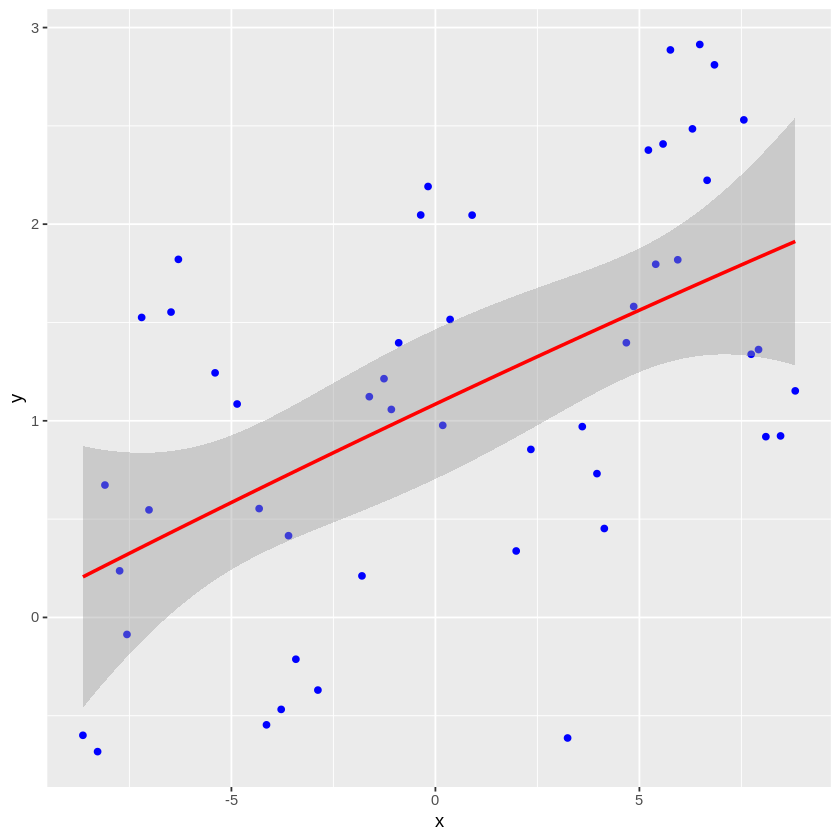

In [75]:
# WRITE YOUR CODE HERE
model_plm<-lm(y~poly(x,2),data=train.set)
ggplot(train.set,aes(x,y))+
  geom_point(color="blue")+
  geom_smooth(method=lm, formula=y~poly(x,2),color="red")

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> *Write your response here*
>

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

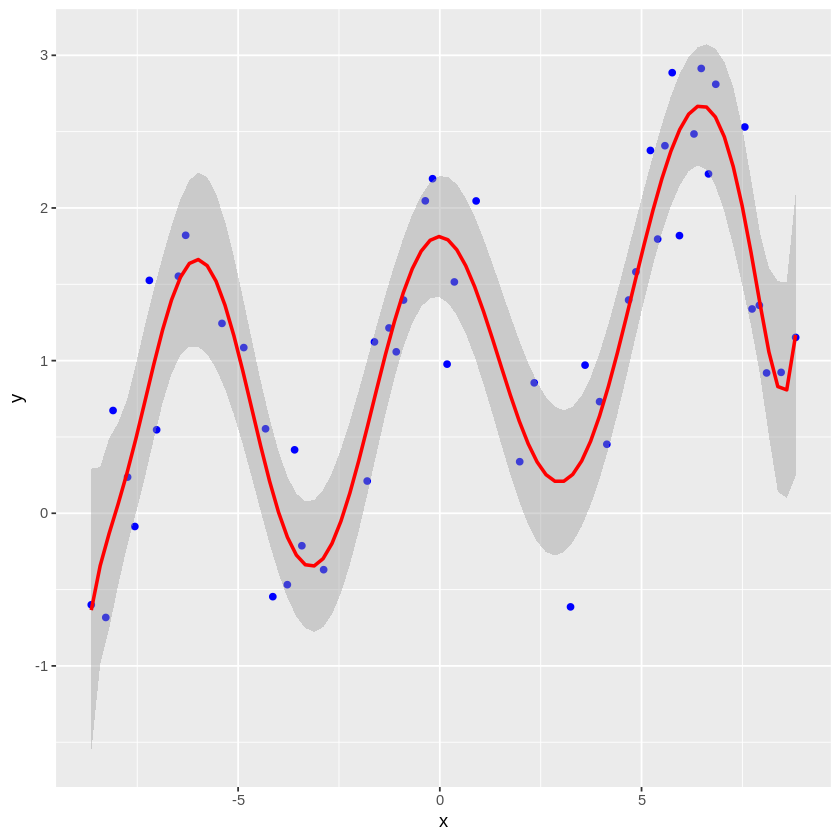

In [76]:
# WRITE YOUR CODE HERE
model_plm1<-lm(y~poly(x,12),data=train.set)
ggplot(train.set,aes(x,y))+
  geom_point(color="blue")+
  geom_smooth(method=lm, formula=y~poly(x,12),color="red")

> *Write your response here*
>

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(model, train.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, test.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, train.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, test.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, train.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, test.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, train.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model, test.set):
“prediction from rank-deficient fit; attr(*, "non-estim") has doub

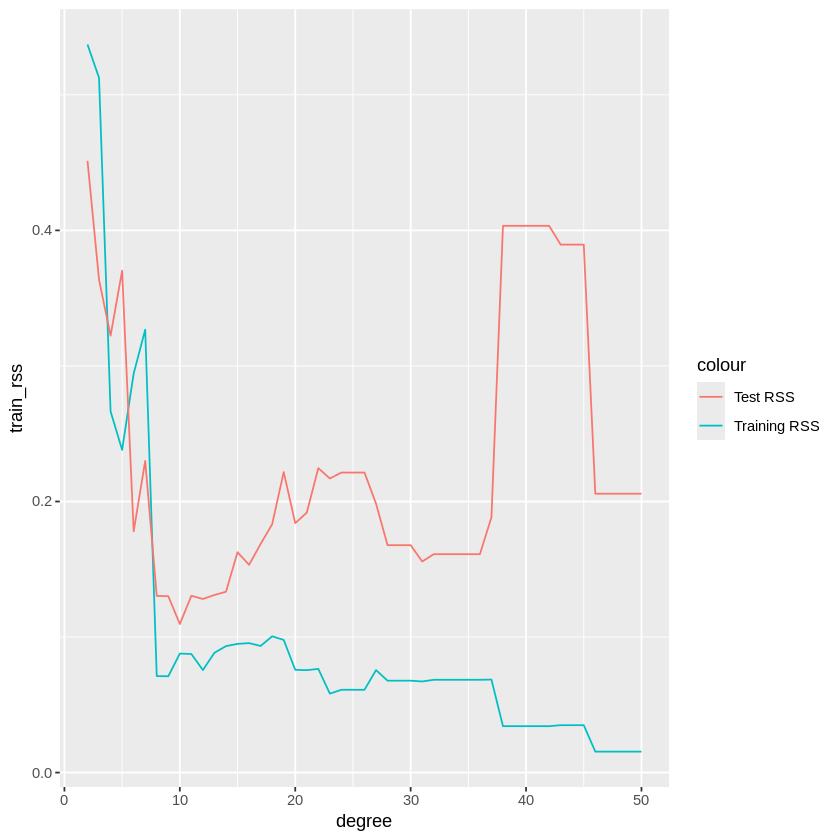

In [91]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    model <- lm(y ~ poly(x, k,raw=TRUE), data = train.set)

    train_pred <- predict(model, train.set)
    train_rss[k - 1] <- median((train.set$y - train_pred)^2)

    test_pred <- predict(model, test.set)
    test_rss[k - 1] <- median((test.set$y - test_pred)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE
# Create a data frame to store the results
rss_data <- data.frame(
    degree = degree,
    train_rss = train_rss,
    test_rss = test_rss
)
ggplot(rss_data, aes(x = degree)) +
  geom_line(aes(y = train_rss, color = "Training RSS")) +
  geom_line(aes(y = test_rss, color = "Test RSS"))

What do you see as $k$ increase?

> *Write your response here*
>

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



In [ ]:
# WRITE YOUR CODE HERE



What do you see as $k$ gets larger than $n$?

> *Write your response here*
>

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

In [ ]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE

}

# Plot your results here
# WRITE YOUR CODE HERE


What happens now when $k$ gets larger than $n$?

> *Write your response here*
>

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here*
>

---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here*
>

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*